## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
sb.set()

## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Loading the data set

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Machine learning/bank-full.csv")

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.shape

(45211, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# printing unique value of categorical data
for col in data.columns:
    if data[col].dtype == 'object':
        unique_values = pd.unique(data[col])
        print(f'{col} : {unique_values}\n')

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital : ['married' 'single' 'divorced']

education : ['tertiary' 'secondary' 'unknown' 'primary']

default : ['no' 'yes']

housing : ['yes' 'no']

loan : ['no' 'yes']

contact : ['unknown' 'cellular' 'telephone']

month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome : ['unknown' 'failure' 'other' 'success']

Target : ['no' 'yes']



## Correlation analysis

In [ ]:
Correlation =data.corr()
Correlation

<ipython-input-10-d505ede0ce3d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation =data.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

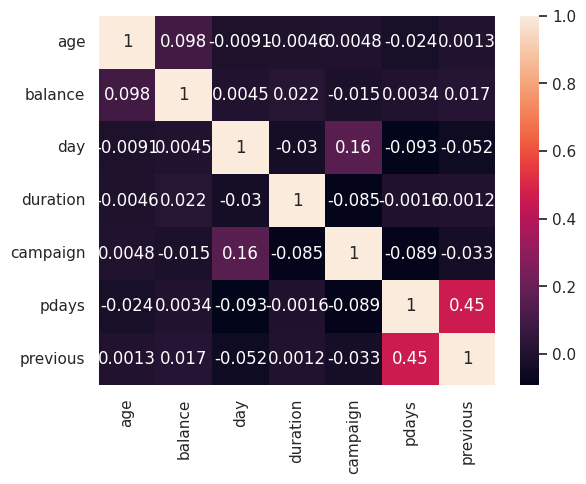

In [ ]:
sb.heatmap(Correlation,xticklabels=Correlation.columns , yticklabels=Correlation.columns , annot=True)

In [ ]:
data["age"].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:
data["balance"].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [ ]:
data["duration"].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

# Visualize the dataset

In [ ]:
#the count of each type of jobs
job_count = data['job'].value_counts()
job_count

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Text(0.5, 1.0, 'Type of Jobs')

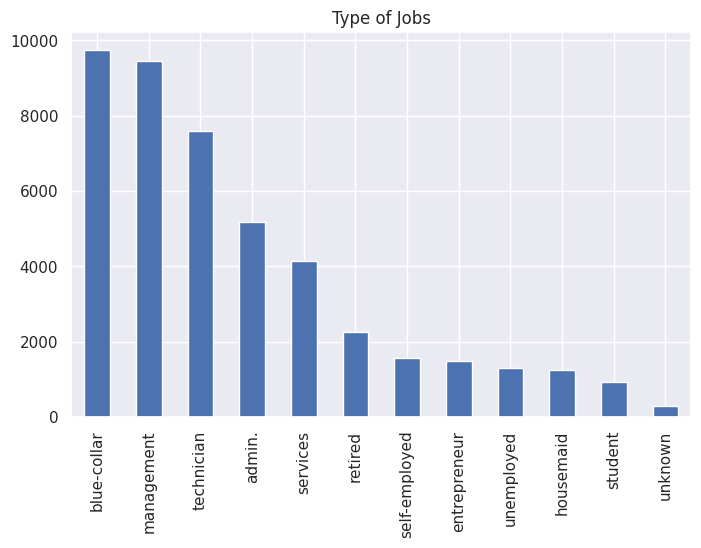

In [ ]:
#count vs job plot
plt.figure(figsize = (8, 5))
job_count.plot(kind = "bar")
plt.title("Type of Jobs")

In [ ]:
#the count of default
default_count = data['default'].value_counts()
default_count

no     44396
yes      815
Name: default, dtype: int64

[Text(0.5, 1.0, 'Default')]

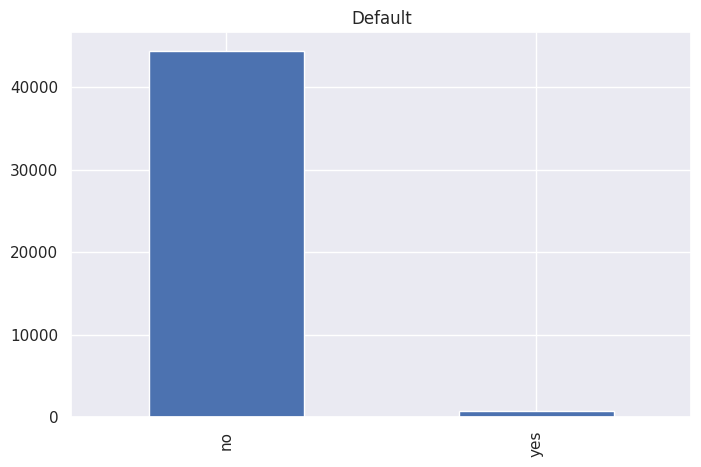

In [ ]:
#count vs default plot
plt.figure(figsize = (8, 5))
default_count.plot(kind='bar').set(title='Default')

In [ ]:
#the count of martial
marital_count = data['marital'].value_counts()
marital_count

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

[Text(0.5, 1.0, 'Mertial')]

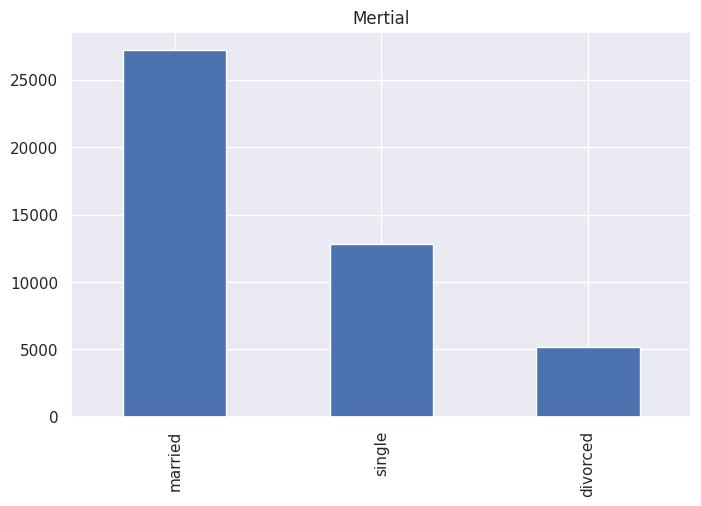

In [ ]:
#count vs martial plot
plt.figure(figsize = (8, 5))
marital_count.plot(kind = "bar").set(title = "Mertial")

In [ ]:
#the count customer has personal loan or not
loan_count = data['loan'].value_counts()
loan_count

no     37967
yes     7244
Name: loan, dtype: int64

[Text(0.5, 1.0, 'Loan')]

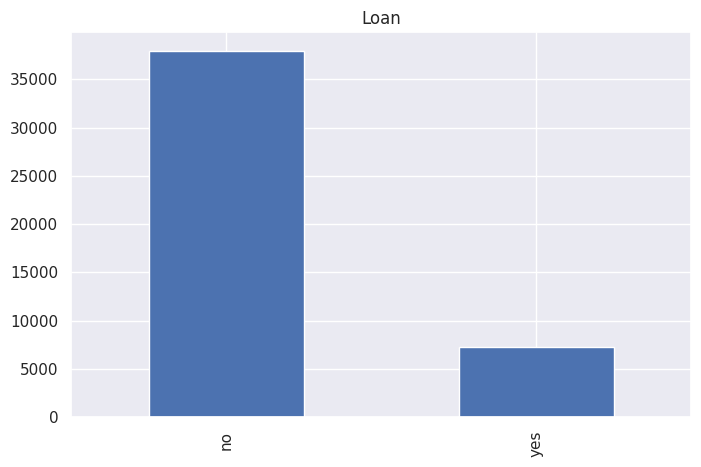

In [ ]:
#Plot customer has a personal loan or not
plt.figure(figsize = (8, 5))
loan_count.plot(kind = "bar").set(title = "Loan")

In [ ]:
#the count client has housing loan or no
housing_count = data['housing'].value_counts()
housing_count

yes    25130
no     20081
Name: housing, dtype: int64

[Text(0.5, 1.0, 'Housing Loan')]

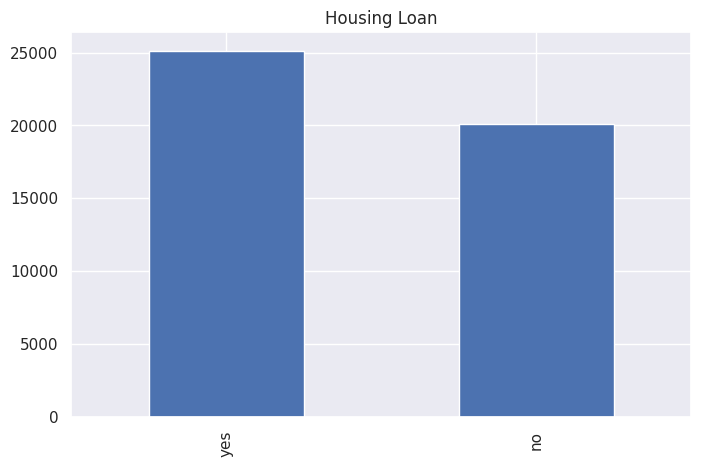

In [ ]:
#client has housing loan or not plot
plt.figure(figsize = (8, 5))
housing_count.plot(kind = "bar").set(title = "Housing Loan")

In [ ]:
#the count of education
education_count = data['education'].value_counts()
education_count

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

[Text(0.5, 1.0, 'Education Column Distribution')]

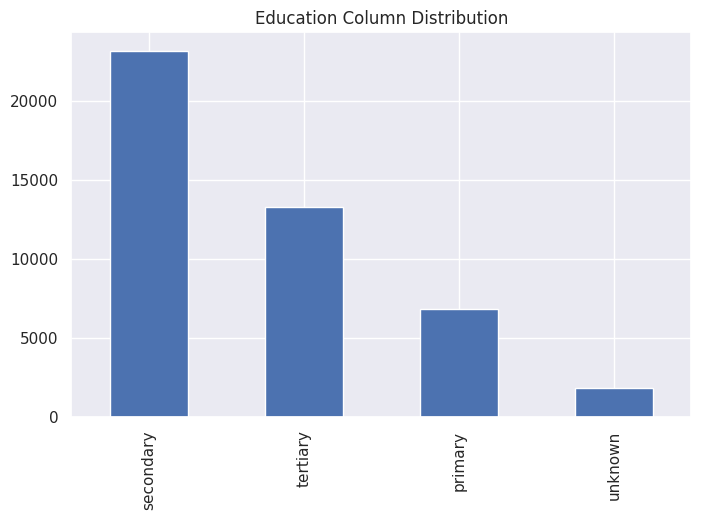

In [ ]:
#count vs education plot
plt.figure(figsize = (8, 5))
education_count.plot(kind = "bar").set(title = "Education Column Distribution")

In [ ]:
#the count of contact
contact_count = data['contact'].value_counts()
contact_count

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

[Text(0.5, 1.0, 'Contact')]

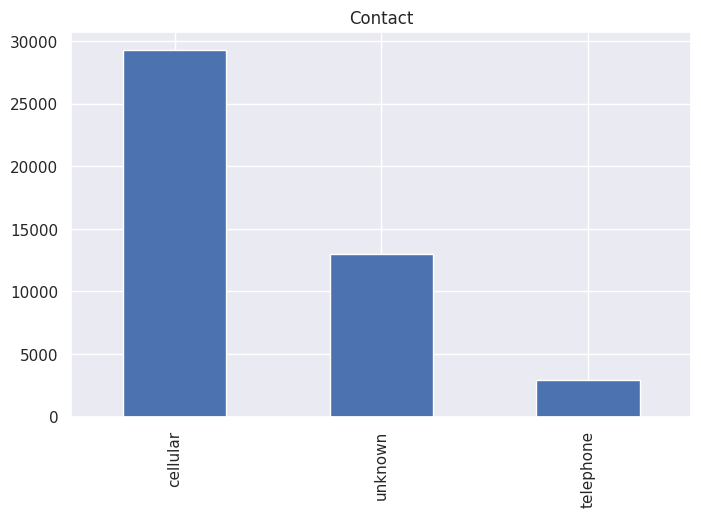

In [ ]:
#count vs contact plot
plt.figure(figsize = (8, 5))
contact_count.plot(kind = "bar").set(title = "Contact")

In [ ]:
#count of month
month_count = data['month'].value_counts()
month_count

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

[Text(0.5, 1.0, 'Month')]

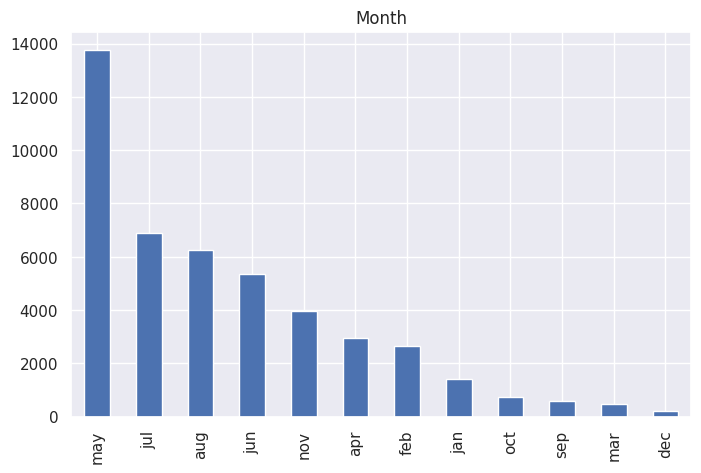

In [ ]:
#count vs month plot
plt.figure(figsize = (8, 5))
month_count.plot(kind = "bar").set(title = "Month")

In [ ]:
#the count of target
target_count = data['Target'].value_counts()
target_count

no     39922
yes     5289
Name: Target, dtype: int64

[Text(0.5, 1.0, 'Target')]

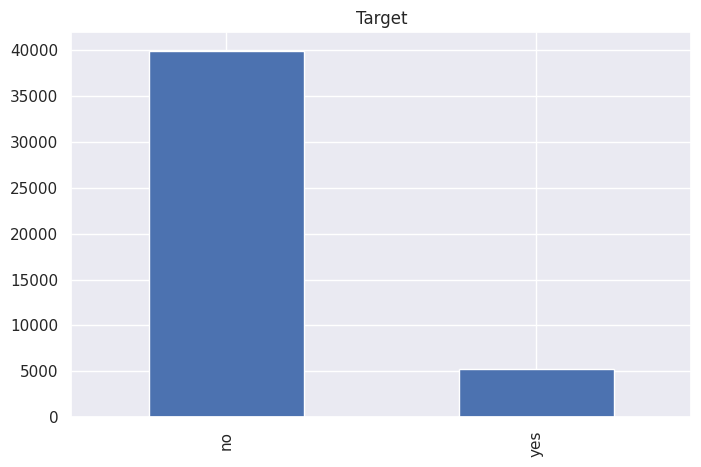

In [ ]:
#target vs count plot
plt.figure(figsize = (8, 5))
target_count.plot(kind = "bar").set(title = "Target")

Text(0.5, 1.0, 'Age')

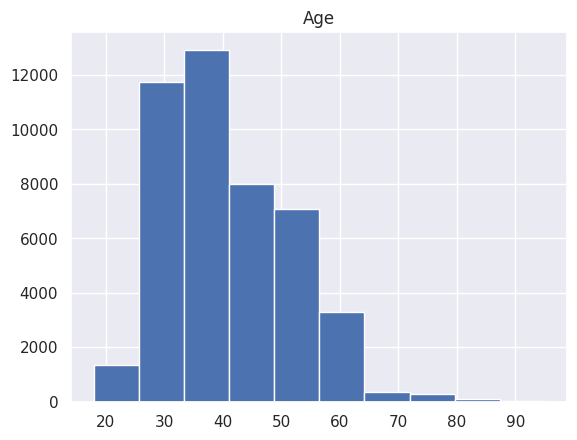

In [ ]:
#histogram of age
plt.hist(data['age'])
plt.title("Age")

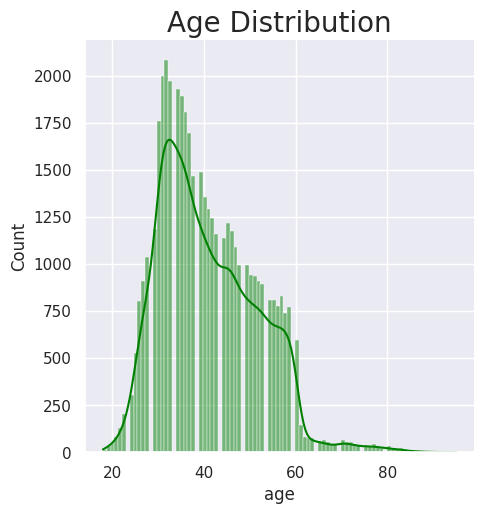

In [ ]:
#distribution of age
sb.displot(data['age'],kde=True,color="green")
plt.title("Age Distribution",fontsize=20)
plt.show()

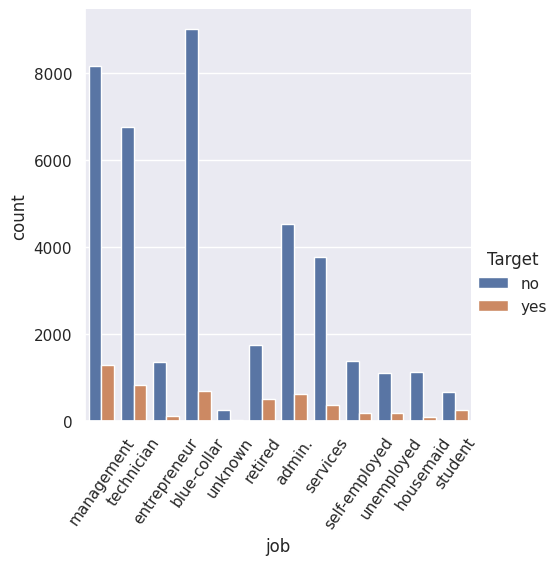

In [ ]:
#job vs target catplot
sb.catplot(data=data,x='job',kind='count',hue='Target')
plt.xticks(rotation=55)
plt.show()

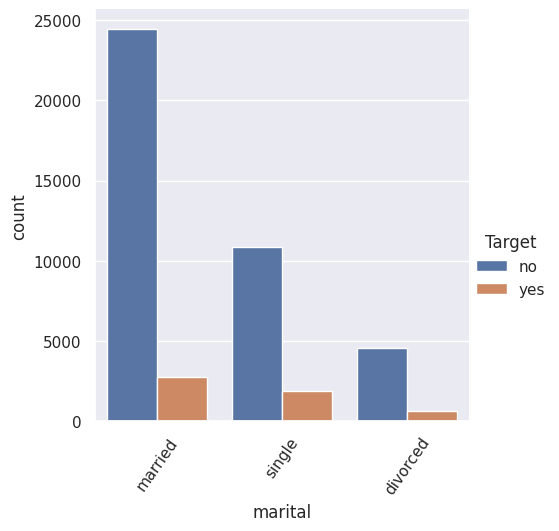

In [ ]:
#Marrital vs target catplot
sb.catplot(data=data,x='marital',kind='count',hue='Target')
plt.xticks(rotation=55)
plt.show()

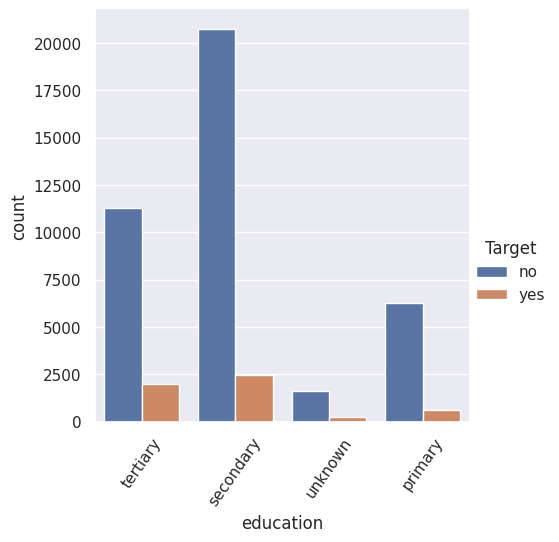

In [ ]:
#Education vs target catplot
sb.catplot(data=data,x='education',kind='count',hue='Target')
plt.xticks(rotation=55)
plt.show()

# Logistic Regression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression

## Converting categorical variable to numerical variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
#creating an encoder
le=LabelEncoder()

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = data.apply(lambda x: object_to_int(x))

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [ ]:
x = df.drop(columns = ['Target'] ) # Independent Features
y = df['Target'] # Feature which we are predicting through the model

In [ ]:
#Divide features and target into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0,stratify=y)

In [ ]:
#View the shape of X_train, X_test
print(x_train.shape)
print(x_test.shape)

(36168, 16)
(9043, 16)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
#Create a LogisticRegression model
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(x_test,y_test)

0.8858785801172178

In [ ]:
# Make predictions on the test data
y_pred = model.predict(x_test)
model.coef_
model.intercept_
y_pred=model.predict(x_test)
y_pred
confusion_matrix(y_test,y_pred)


array([[7827,  158],
       [ 874,  184]])

In [ ]:
accuracy=(np.diag(confusion_matrix(y_test,y_pred)).sum())/len(y_test)*100/100
accuracy

0.8858785801172178